# Heart disease EDA, classification and understanding

## Dataset used: https://www.kaggle.com/ronitf/heart-disease-uci

## Features:

#### 1. age
#### 2. sex
#### 3. chest pain type (4 values) (the severity of chest pain the patient experienced)
#### 4. resting blood pressure
#### 5. serum cholestoral in mg/dl (the serum cholestoral level of the patient)
#### 6. fasting blood sugar > 120 mg/dl (if the patients blood sugar when fasting is greater than 120)
#### 7. resting electrocardiographic results (values 0,1,2) (results of the patient after an electrocardiography process)
#### 8. maximum heart rate achieved
#### 9. exercise induced angina (whether the patient experienced execercise induced angina)
#### 10. oldpeak = ST depression induced by exercise relative to rest
#### 11. the slope of the peak exercise ST segment
#### 12. number of major vessels (0-3) colored by flourosopy (shows up on the scan)
#### 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

## Questions:

#### - What age group is most at risk of heart disease?
#### - Is heart disease commonly reversable?
#### - What gender is most at risk of heart disease?
#### - What blood pressures are typically associated with heart disease?

### Loading the data

In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')
df.columns = ["age", "sex", "chest_pain_type", "resting_blood_pressure", "serum_cholestoral", "fasting_blood_sugar>120", "electrocardiographic_results", 
              "max_heart_rate", "excercise_induced_angina", "st_depression_while resting", "excercise_st_segment_slope", "flouroscopy_colored_vessels", 
              "defect_type", "has_heart_disease"]
df.head(3)

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar>120,electrocardiographic_results,max_heart_rate,excercise_induced_angina,st_depression_while resting,excercise_st_segment_slope,flouroscopy_colored_vessels,defect_type,has_heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


### Understand the data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age                             303 non-null int64
sex                             303 non-null int64
chest_pain_type                 303 non-null int64
resting_blood_pressure          303 non-null int64
serum_cholestoral               303 non-null int64
fasting_blood_sugar>120         303 non-null int64
electrocardiographic_results    303 non-null int64
max_heart_rate                  303 non-null int64
excercise_induced_angina        303 non-null int64
st_depression_while resting     303 non-null float64
excercise_st_segment_slope      303 non-null int64
flouroscopy_colored_vessels     303 non-null int64
defect_type                     303 non-null int64
has_heart_disease               303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar>120,electrocardiographic_results,max_heart_rate,excercise_induced_angina,st_depression_while resting,excercise_st_segment_slope,flouroscopy_colored_vessels,defect_type,has_heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Displaying the distributions of features and finding categorical variables

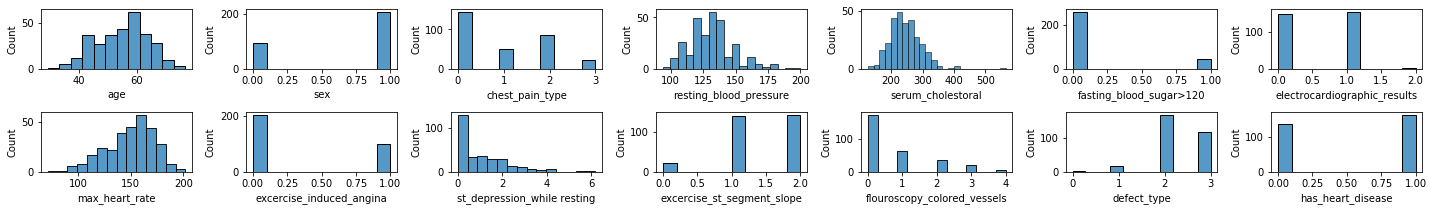

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,3)

_, axes = plt.subplots(2, 7)

for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, ax=axes[i // 7, i % 7])
plt.tight_layout()

In [5]:
print("Column: Unique categorical values")
for col in ['sex', 'chest_pain_type', 'fasting_blood_sugar>120', 'electrocardiographic_results', 'excercise_induced_angina', 'excercise_st_segment_slope', 
            'flouroscopy_colored_vessels', 'defect_type', 'has_heart_disease']:
    print(f"{col}: {df[col].unique()}")

Column: Unique categorical values
sex: [1 0]
chest_pain_type: [3 2 1 0]
fasting_blood_sugar>120: [1 0]
electrocardiographic_results: [0 1 2]
excercise_induced_angina: [0 1]
excercise_st_segment_slope: [0 2 1]
flouroscopy_colored_vessels: [0 2 1 3 4]
defect_type: [1 2 3 0]
has_heart_disease: [1 0]


### What age group is most at risk of heart disease?

Text(0.5, 1.0, 'Age groups of heart disease')

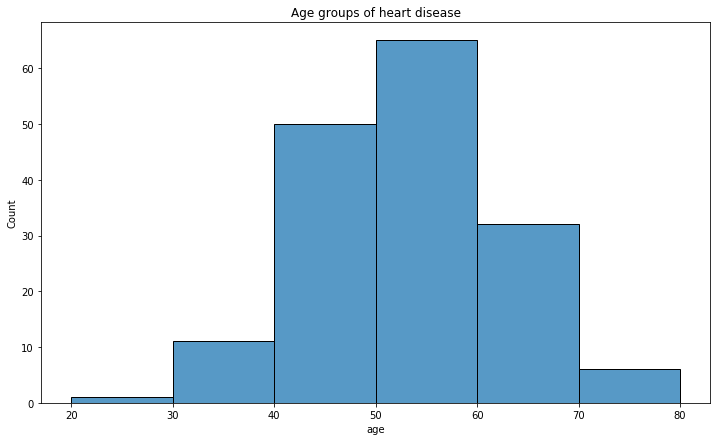

In [8]:
plt.rcParams["figure.figsize"] = (12,7)
graph = sns.histplot(df[df['has_heart_disease'] == 1], x='age', bins=[20, 30, 40, 50, 60, 70, 80])
graph.set_title('Age groups of heart disease')

In [49]:
df['age_bins'] = df['age'].apply(lambda x: (x // 10) * 10)
age_grouped = df.groupby(['age_bins', 'has_heart_disease']).count()
age_grouped['indx_tmp'] = age_grouped.index
age_grouped['age_bins'] = age_grouped['indx_tmp'].apply(lambda x: x[0])
age_grouped['has_heart_disease'] = age_grouped['indx_tmp'].apply(lambda x: x[1])
age_grouped = age_grouped.drop(['indx_tmp'], axis=1)

In [50]:
age_grouped

age  sex  chest_pain_type  resting_blood_pressure  \
age_bins has_heart_disease                                                      
20       1                    1    1                1                       1   
30       0                    4    4                4                       4   
         1                   11   11               11                      11   
40       0                   22   22               22                      22   
         1                   50   50               50                      50   
50       0                   60   60               60                      60   
         1                   65   65               65                      65   
60       0                   48   48               48                      48   
         1                   32   32               32                      32   
70       0                    4    4                4                       4   
         1                    6    6                6                       6   

                            serum_cholestoral  fasting_blood_sugar>120  \
age_bins has_heart_disease                                               
20       1                                  1                        1   
30       0                                  4                        4   
         1                                 11                       11   
40       0                                 22                       22   
         1                                 50                       50   
50       0                                 60                       60   
         1                                 65                       65   
60       0                                 48                       48   
         1                                 32                       32   
70       0                                  4                        4   
         1                                  6                        6   

                            electrocardiographic_results  max_heart_rate  \
age_bins has_heart_disease                                                 
20       1                                             1               1   
30       0                                             4               4   
         1                                            11              11   
40       0                                            22              22   
         1                                            50              50   
50       0                                            60              60   
         1                                            65              65   
60       0                                            48              48   
         1                                            32              32   
70       0                                             4               4   
         1                                             6               6   

                            excercise_induced_angina  \
age_bins has_heart_disease                             
20       1                                         1   
30       0                                         4   
         1                                        11   
40       0                                        22   
         1                                        50   
50       0                                        60   
         1                                        65   
60       0                                        48   
         1                                        32   
70       0                                         4   
         1                                         6   

                            st_depression_while resting  \
age_bins has_heart_disease                                
20       1                                            1   
30       0                                            4   
         1                                           11  